<a href="https://colab.research.google.com/github/Saurabh703/Machine-Learning-/blob/main/Stock_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('stock_market.csv')
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.shape

(1235, 8)

In [ ]:
dataset.drop(['Total Trade Quantity','Turnover (Lacs)'],axis=1,inplace=True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Last,Close
0,2018-10-08,208.00,222.25,206.85,216.00,215.15
1,2018-10-05,217.00,218.60,205.90,210.25,209.20
2,2018-10-04,223.50,227.80,216.15,217.25,218.20
3,2018-10-03,230.00,237.50,225.75,226.45,227.60
4,2018-10-01,234.55,234.60,221.05,230.30,230.90


In [ ]:
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Last     0
Close    0
dtype: int64

In [ ]:
dataset.isna().any()

Date     False
Open     False
High     False
Low      False
Last     False
Close    False
dtype: bool

<AxesSubplot:>

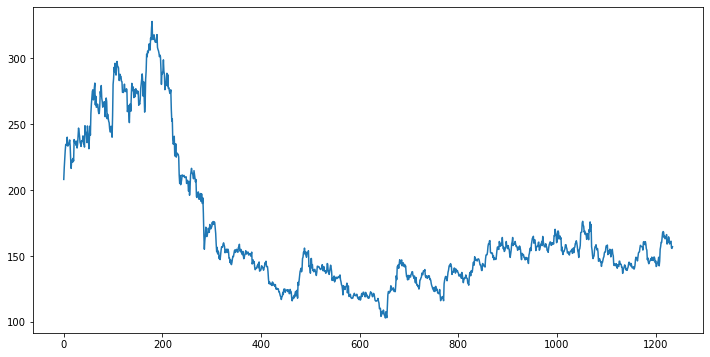

In [ ]:
dataset['Open'].plot(figsize=(12,6))

In [ ]:
X = dataset[['Open','High','Low','Last']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(864, 4)

In [ ]:
X_test.shape

(371, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[-0.06398777  0.0893093   0.08567167  0.88808084]


In [ ]:
print(regression.intercept_)

0.12479122859548397


In [ ]:
predicted = regression.predict(X_test)

In [ ]:
print(X_test)

        Open    High     Low    Last
1083  152.95  154.85  151.05  153.35
18    221.00  224.50  219.10  223.15
1099  156.50  157.00  151.85  153.00
818   132.95  133.90  132.30  133.20
184   314.65  319.20  312.20  317.45
...      ...     ...     ...     ...
946   156.00  157.20  154.40  155.35
200   288.00  288.25  279.20  284.50
875   148.00  149.40  147.75  149.00
65    271.00  273.10  263.25  264.50
638   115.65  117.50  114.55  116.70

[371 rows x 4 columns]


In [ ]:
predicted = regression.predict(X_test)

In [ ]:
print(X_test)

        Open    High     Low    Last
1083  152.95  154.85  151.05  153.35
18    221.00  224.50  219.10  223.15
1099  156.50  157.00  151.85  153.00
818   132.95  133.90  132.30  133.20
184   314.65  319.20  312.20  317.45
...      ...     ...     ...     ...
946   156.00  157.20  154.40  155.35
200   288.00  288.25  279.20  284.50
875   148.00  149.40  147.75  149.00
65    271.00  273.10  263.25  264.50
638   115.65  117.50  114.55  116.70

[371 rows x 4 columns]


In [ ]:
predicted.shape

(371,)

In [ ]:
dframe = pd.DataFrame(y_test, predicted)

In [ ]:
dfr = pd.DataFrame({'Actual':y_test, 'Predicted': predicted})

In [ ]:
print(dfr)

      Actual   Predicted
1083  153.45  153.295308
18    222.95  222.979333
1099  152.95  153.017876
818   132.60  133.202861
184   317.60  317.166524
...      ...         ...
946   155.65  155.373184
200   284.30  284.018247
875   149.00  148.979444
65    264.45  264.624923
638   116.85  116.671171

[371 rows x 2 columns]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regression.score(X_test,y_test)

0.9999340876966673

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 0.29507229057545664


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 0.16288761987681696


In [ ]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 0.4035933843323215


In [ ]:
graph = dfr.head(30)

<AxesSubplot:>

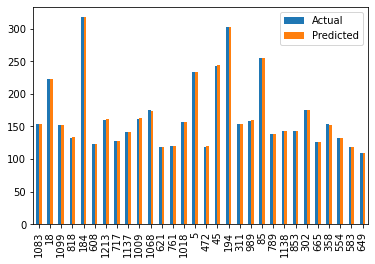

In [ ]:
graph.plot(kind='bar')